In [1]:
!pip list

Package                  Version
------------------------ --------
aiofiles                 22.1.0
aiosqlite                0.18.0
anyio                    3.5.0
argon2-cffi              21.3.0
argon2-cffi-bindings     21.2.0
asttokens                2.0.5
attrs                    22.1.0
Babel                    2.11.0
backcall                 0.2.0
beautifulsoup4           4.12.2
bleach                   4.1.0
brotlipy                 0.7.0
certifi                  2023.5.7
cffi                     1.15.1
charset-normalizer       2.0.4
colorama                 0.4.6
comm                     0.1.2
cryptography             39.0.1
debugpy                  1.5.1
decorator                5.1.1
defusedxml               0.7.1
entrypoints              0.4
executing                0.8.3
fastjsonschema           2.16.2
idna                     3.4
ipykernel                6.19.2
ipython                  8.12.0
ipython-genutils         0.2.0
ipywidgets               8.0.4
jedi                   

In [34]:
#!pip install numpy
#!pip install pandas
#!pip install rasterio
#!pip install opencv-python
#!pip install pillow
!conda install matplotlib

^C


In [35]:
!pip install matplotlib

     ---------------------------------------- 0.0/7.6 MB ? eta -:--:--
     - -------------------------------------- 0.3/7.6 MB 10.6 MB/s eta 0:00:01
     - -------------------------------------- 0.4/7.6 MB 7.6 MB/s eta 0:00:01
     - -------------------------------------- 0.4/7.6 MB 7.6 MB/s eta 0:00:01
     - -------------------------------------- 0.4/7.6 MB 7.6 MB/s eta 0:00:01
     --- ------------------------------------ 0.6/7.6 MB 2.9 MB/s eta 0:00:03
     --- ------------------------------------ 0.8/7.6 MB 3.2 MB/s eta 0:00:03
     --- ------------------------------------ 0.8/7.6 MB 3.2 MB/s eta 0:00:03
     --- ------------------------------------ 0.8/7.6 MB 3.2 MB/s eta 0:00:03
     ----- ---------------------------------- 1.1/7.6 MB 2.8 MB/s eta 0:00:03
     ------ --------------------------------- 1.3/7.6 MB 3.2 MB/s eta 0:00:02
     ------ --------------------------------- 1.3/7.6 MB 3.2 MB/s eta 0:00:02
     ------ --------------------------------- 1.3/7.6 MB 3.2 MB/s eta 

In [13]:
import os
import rasterio
from rasterio.merge import merge
from rasterio.enums import Resampling
from rasterio.crs import CRS
from rasterio.transform import Affine

In [10]:
folder_path = 'D:/projects/research/smoke/dataset/original/tiff'

In [5]:
datasets = []
for file in os.listdir(folder_path):
    if file.endswith('.tif') or file.endswith('.tiff'):
        file_path = os.path.join(folder_path, file)
        dataset = rasterio.open(file_path)
        datasets.append(dataset)

In [11]:
desired_crs = CRS.from_epsg(4326)  # Replace with the desired EPSG code

for file in os.listdir(folder_path):
    if file.endswith('.tif') or file.endswith('.tiff'):
        file_path = os.path.join(folder_path, file)
        with rasterio.open(file_path, 'r+') as dataset:
            dataset.crs = desired_crs


In [12]:
import os

image_paths = []  # List to store the image paths

# Iterate over the files in the folder
for root, dirs, files in os.walk(folder_path):
    for file in files:
        file_path = os.path.join(root, file)
        image_paths.append(file_path)

# Print the image paths
for path in image_paths:
    print(path)


D:/projects/research/smoke/dataset/original/tiff\time-20170652036101-loc--102.0_35.2_-97.2_39.5.tif
D:/projects/research/smoke/dataset/original/tiff\time-20170691915027-loc--86.6_30.1_-86.0_30.7.tif
D:/projects/research/smoke/dataset/original/tiff\time-20170691915027-loc--96.7_36.3_-96.0_36.8.tif
D:/projects/research/smoke/dataset/original/tiff\time-20170732051100-loc--95.5_29.4_-93.4_31.9.tif
D:/projects/research/smoke/dataset/original/tiff\time-20170732051100-loc--98.6_26.7_-97.6_27.6.tif
D:/projects/research/smoke/dataset/original/tiff\time-20170762021100-loc--83.4_26.1_-80.5_28.9.tif
D:/projects/research/smoke/dataset/original/tiff\time-20170781721102-loc--82.4_31.4_-78.7_34.7.tif
D:/projects/research/smoke/dataset/original/tiff\time-20170792121100-loc--82.1_25.4_-80.5_27.7.tif
D:/projects/research/smoke/dataset/original/tiff\time-20170831800415-loc--82.0_35.6_-81.5_36.1.tif
D:/projects/research/smoke/dataset/original/tiff\time-20170902115380-loc--108.3_28.2_-106.0_30.0.tif
D:/proj

In [14]:
def get_bounds_and_transform(image_paths):
    with rasterio.open(file_path) as dataset:
        bounds = dataset.bounds
        transform = dataset.transform
    return bounds, transform

In [15]:
reference_bounds, reference_transform = get_bounds_and_transform(image_paths[0])

for file_path in image_paths[1:]:
    bounds, transform = get_bounds_and_transform(file_path)
    
    if bounds != reference_bounds or transform != reference_transform:
        print(f"Bounds or transform inconsistency detected in {file_path}")


Bounds or transform inconsistency detected in D:/projects/research/smoke/dataset/original/tiff\time-20170691915027-loc--86.6_30.1_-86.0_30.7.tif
Bounds or transform inconsistency detected in D:/projects/research/smoke/dataset/original/tiff\time-20170691915027-loc--96.7_36.3_-96.0_36.8.tif
Bounds or transform inconsistency detected in D:/projects/research/smoke/dataset/original/tiff\time-20170732051100-loc--95.5_29.4_-93.4_31.9.tif
Bounds or transform inconsistency detected in D:/projects/research/smoke/dataset/original/tiff\time-20170732051100-loc--98.6_26.7_-97.6_27.6.tif
Bounds or transform inconsistency detected in D:/projects/research/smoke/dataset/original/tiff\time-20170762021100-loc--83.4_26.1_-80.5_28.9.tif
Bounds or transform inconsistency detected in D:/projects/research/smoke/dataset/original/tiff\time-20170781721102-loc--82.4_31.4_-78.7_34.7.tif
Bounds or transform inconsistency detected in D:/projects/research/smoke/dataset/original/tiff\time-20170792121100-loc--82.1_25.4_

Bounds or transform inconsistency detected in D:/projects/research/smoke/dataset/original/tiff\time-20171891930380-loc--123.2_29.9_-117.0_37.2.tif
Bounds or transform inconsistency detected in D:/projects/research/smoke/dataset/original/tiff\time-20171912315380-loc--114.6_42.6_-111.0_44.6.tif
Bounds or transform inconsistency detected in D:/projects/research/smoke/dataset/original/tiff\time-20171912315380-loc--117.1_40.7_-115.2_42.6.tif
Bounds or transform inconsistency detected in D:/projects/research/smoke/dataset/original/tiff\time-20171912315380-loc--120.4_38.9_-118.7_40.4.tif
Bounds or transform inconsistency detected in D:/projects/research/smoke/dataset/original/tiff\time-20171972045379-loc--112.8_46.6_-108.3_50.1.tif
Bounds or transform inconsistency detected in D:/projects/research/smoke/dataset/original/tiff\time-20171972045379-loc--94.8_45.6_-92.1_48.9.tif
Bounds or transform inconsistency detected in D:/projects/research/smoke/dataset/original/tiff\time-20171982015379-loc--

Bounds or transform inconsistency detected in D:/projects/research/smoke/dataset/original/tiff\time-20180252000421-loc--98.2_31.1_-97.6_32.0.tif
Bounds or transform inconsistency detected in D:/projects/research/smoke/dataset/original/tiff\time-20180302000443-loc--87.6_30.0_-86.4_31.3.tif
Bounds or transform inconsistency detected in D:/projects/research/smoke/dataset/original/tiff\time-20180372300476-loc--122.1_40.8_-121.1_41.8.tif
Bounds or transform inconsistency detected in D:/projects/research/smoke/dataset/original/tiff\time-20180572000406-loc--100.0_32.6_-99.0_33.1.tif
Bounds or transform inconsistency detected in D:/projects/research/smoke/dataset/original/tiff\time-20180572000406-loc--96.1_34.2_-94.7_35.2.tif
Bounds or transform inconsistency detected in D:/projects/research/smoke/dataset/original/tiff\time-20180572000406-loc--99.4_30.8_-99.0_31.1.tif
Bounds or transform inconsistency detected in D:/projects/research/smoke/dataset/original/tiff\time-20180581800411-loc--81.0_33

Bounds or transform inconsistency detected in D:/projects/research/smoke/dataset/original/tiff\time-20182762200375-loc--104.7_34.3_-95.7_40.3.tif
Bounds or transform inconsistency detected in D:/projects/research/smoke/dataset/original/tiff\time-20182802115377-loc--126.0_35.0_-118.0_42.0.tif
Bounds or transform inconsistency detected in D:/projects/research/smoke/dataset/original/tiff\time-20182882345380-loc--131.0_39.5_-115.0_49.0.tif
Bounds or transform inconsistency detected in D:/projects/research/smoke/dataset/original/tiff\time-20183122000358-loc--126.0_35.0_-117.0_41.0.tif
Bounds or transform inconsistency detected in D:/projects/research/smoke/dataset/original/tiff\time-20183131800356-loc--131.0_30.3_-111.8_41.0.tif
Bounds or transform inconsistency detected in D:/projects/research/smoke/dataset/original/tiff\time-20190111900352-loc--88.7_29.0_-84.1_32.3.tif
Bounds or transform inconsistency detected in D:/projects/research/smoke/dataset/original/tiff\time-20190211900344-loc--8

Bounds or transform inconsistency detected in D:/projects/research/smoke/dataset/original/tiff\time-20191341910331-loc--104.0_21.77_-103.35_22.2.tif
Bounds or transform inconsistency detected in D:/projects/research/smoke/dataset/original/tiff\time-20191341910331-loc--104.2_22.3_-104.45_22.62.tif
Bounds or transform inconsistency detected in D:/projects/research/smoke/dataset/original/tiff\time-20191341910331-loc--104.43_22.81_-104.17_23.06.tif
Bounds or transform inconsistency detected in D:/projects/research/smoke/dataset/original/tiff\time-20191341910331-loc--104.74_23.3_-103.64_24.3.tif
Bounds or transform inconsistency detected in D:/projects/research/smoke/dataset/original/tiff\time-20191341910331-loc--105.8_23.25_-104.85_24.1.tif
Bounds or transform inconsistency detected in D:/projects/research/smoke/dataset/original/tiff\time-20191341910331-loc--99.28_39.4_-98.73_39.71.tif
Bounds or transform inconsistency detected in D:/projects/research/smoke/dataset/original/tiff\time-20191

Bounds or transform inconsistency detected in D:/projects/research/smoke/dataset/original/tiff\time-20192002310410-loc--115.5_43.9_-113.97_45.2.tif
Bounds or transform inconsistency detected in D:/projects/research/smoke/dataset/original/tiff\time-20192052310435-loc--113.4_43.1_-111.3_44.9.tif
Bounds or transform inconsistency detected in D:/projects/research/smoke/dataset/original/tiff\time-20192052310435-loc--115.2_44.4_-114.5_44.8.tif
Bounds or transform inconsistency detected in D:/projects/research/smoke/dataset/original/tiff\time-20192052310435-loc--121.05_45.7_-116.8_48.2.tif
Bounds or transform inconsistency detected in D:/projects/research/smoke/dataset/original/tiff\time-20192062210442-loc--123.55_42.4_-113.8_47.8.tif
Bounds or transform inconsistency detected in D:/projects/research/smoke/dataset/original/tiff\time-20192072210448-loc--100.5_30.15_-99.7_30.8.tif
Bounds or transform inconsistency detected in D:/projects/research/smoke/dataset/original/tiff\time-20192072210448-

In [16]:
import os
import rasterio
from rasterio.enums import Resampling
from rasterio.transform import Affine

In [17]:
resample_factor = 0.5  # Specify the resampling factor (e.g., 0.5 for half the resolution)
desired_transform = Affine(10.0, 0.0, 0.0, 0.0, -10.0, 0.0)
desired_bounds = (100, -50, 200, 50)

In [18]:
for file in os.listdir(folder_path):
    if file.endswith('.tif') or file.endswith('.tiff'):
        file_path = os.path.join(folder_path, file)
        with rasterio.open(file_path, 'r+') as dataset:
            # Perform resampling
            resampled_data = dataset.read(
                out_shape=(
                    dataset.count,
                    int(dataset.height * resample_factor),
                    int(dataset.width * resample_factor)
                ),
                resampling=Resampling.bilinear
            )
            
            # Update the transform and bounds
            dataset.transform = desired_transform * dataset.transform
            dataset.bounds = (
                desired_bounds[0],
                desired_bounds[1],
                desired_bounds[0] + desired_transform.a * dataset.width,
                desired_bounds[1] + desired_transform.e * dataset.height
            )
            
            # Write the resampled data to the dataset
            dataset.write(resampled_data)


AttributeError: attribute 'bounds' of 'rasterio._base.DatasetBase' objects is not writable

In [19]:
import os
import rasterio
from rasterio.enums import Resampling
from rasterio.transform import Affine

# Specify the input folder path containing the TIFF images
input_folder = 'D:/projects/research/smoke/dataset/original/tiff'  # Replace with the actual input folder path

# Specify the output folder path for saving the resampled images
output_folder = 'D:/projects/research/smoke/dataset/resampled/tiff'  # Replace with the actual output folder path

# Define the desired resampling factor, transform, and bounds
resample_factor = 0.5  # Specify the resampling factor (e.g., 0.5 for half the resolution)
desired_transform = Affine(10.0, 0.0, 0.0, 0.0, -10.0, 0.0)
desired_bounds = (100, -50, 200, 50)

# Iterate over the files in the input folder
for file in os.listdir(input_folder):
    if file.endswith('.tif') or file.endswith('.tiff'):
        input_file = os.path.join(input_folder, file)
        output_file = os.path.join(output_folder, file)

        with rasterio.open(input_file, 'r') as dataset:
            # Perform resampling
            resampled_data = dataset.read(
                out_shape=(
                    dataset.count,
                    int(dataset.height * resample_factor),
                    int(dataset.width * resample_factor)
                ),
                resampling=Resampling.bilinear
            )

            # Update the transform and bounds
            dataset_transform = dataset.transform
            dataset_bounds = dataset.bounds
            new_transform = desired_transform * dataset_transform
            new_bounds = (
                desired_bounds[0],
                desired_bounds[1],
                desired_bounds[0] + new_transform.a * dataset.width,
                desired_bounds[1] + new_transform.e * dataset.height
            )

            # Update the metadata for the resampled image
            profile = dataset.profile
            profile.update(
                transform=new_transform,
                width=resampled_data.shape[2],
                height=resampled_data.shape[1],
                bounds=new_bounds
            )

            # Save the resampled image to the output folder
            with rasterio.open(output_file, 'w', **profile) as output_dataset:
                output_dataset.write(resampled_data)


In [20]:
import os
import rasterio

# Specify the folder path containing the TIFF images
folder_path = 'D:/projects/research/smoke/dataset/resampled/tiff'  # Replace with the actual folder path

# Initialize variables to track consistency
consistent_bounds = True
consistent_transforms = True

# Iterate over the files in the folder
for file in os.listdir(folder_path):
    if file.endswith('.tif') or file.endswith('.tiff'):
        file_path = os.path.join(folder_path, file)
        with rasterio.open(file_path, 'r') as dataset:
            bounds = dataset.bounds
            transform = dataset.transform

            # Check bounds consistency
            if bounds != bounds:
                consistent_bounds = False
                print(f"Inconsistent bounds found in file: {file}")

            # Check transform consistency
            if transform != transform:
                consistent_transforms = False
                print(f"Inconsistent transform found in file: {file}")

# Check overall consistency
if consistent_bounds:
    print("All files have consistent bounds.")
else:
    print("Inconsistencies found in bounds.")

if consistent_transforms:
    print("All files have consistent transforms.")
else:
    print("Inconsistencies found in transforms.")


All files have consistent bounds.
All files have consistent transforms.


In [25]:
# Specify the folder path containing the TIFF images
folder_path = 'D:/projects/research/smoke/dataset/resampled/tiff'  # Replace with the actual folder path

# Create the output stacked TIFF file
output_file = 'D:/projects/research/smoke/dataset/stacked.tif'  # Replace with the desired output file path



In [31]:
import os
import rasterio
from rasterio.enums import Resampling

# Specify the input folder path containing the TIFF images
input_folder_path = 'D:/projects/research/smoke/dataset/resampled/tiff'  # Replace with the actual input folder path

# Specify the output folder path for saving the resampled images
output_folder_path = 'D:/projects/research/smoke/dataset/resampled/resized/tiff'  # Replace with the actual output folder path

# Specify the target size for resampling
target_width = 256
target_height = 256

# Collect file paths of all TIFF images in the input folder
tif_files = [os.path.join(input_folder_path, file) for file in os.listdir(input_folder_path) if file.endswith('.tif') or file.endswith('.tiff')]

# Iterate over the TIFF images and perform resampling
for tif_file in tif_files:
    # Open the image for reading
    with rasterio.open(tif_file, 'r') as src:
        # Perform resampling
        resampled_data = src.read(
            out_shape=(src.count, target_height, target_width),
            resampling=Resampling.bilinear
        )

    # Get the metadata from the source image
    meta = src.meta

    # Update the metadata with the new shape and resolution
    meta.update(width=target_width, height=target_height, transform=src.transform)

    # Generate the output file path by replacing the input folder path with the output folder path
    output_file = os.path.join(output_folder_path, os.path.basename(tif_file))

    # Write the resampled data to the output file
    with rasterio.open(output_file, 'w', **meta) as dst:
        dst.write(resampled_data, indexes=src.indexes)

    print(f"Resampled image saved to: {output_file}")



Resampled image saved to: D:/projects/research/smoke/dataset/resampled/resized/tiff\time-20170652036101-loc--102.0_35.2_-97.2_39.5.tif
Resampled image saved to: D:/projects/research/smoke/dataset/resampled/resized/tiff\time-20170691915027-loc--86.6_30.1_-86.0_30.7.tif
Resampled image saved to: D:/projects/research/smoke/dataset/resampled/resized/tiff\time-20170691915027-loc--96.7_36.3_-96.0_36.8.tif
Resampled image saved to: D:/projects/research/smoke/dataset/resampled/resized/tiff\time-20170732051100-loc--95.5_29.4_-93.4_31.9.tif
Resampled image saved to: D:/projects/research/smoke/dataset/resampled/resized/tiff\time-20170732051100-loc--98.6_26.7_-97.6_27.6.tif
Resampled image saved to: D:/projects/research/smoke/dataset/resampled/resized/tiff\time-20170762021100-loc--83.4_26.1_-80.5_28.9.tif
Resampled image saved to: D:/projects/research/smoke/dataset/resampled/resized/tiff\time-20170781721102-loc--82.4_31.4_-78.7_34.7.tif
Resampled image saved to: D:/projects/research/smoke/dataset/

Resampled image saved to: D:/projects/research/smoke/dataset/resampled/resized/tiff\time-20171822115380-loc--110.8_31.6_-107.7_35.4.tif
Resampled image saved to: D:/projects/research/smoke/dataset/resampled/resized/tiff\time-20171851615383-loc--108.8_47.6_-107.6_48.3.tif
Resampled image saved to: D:/projects/research/smoke/dataset/resampled/resized/tiff\time-20171882315382-loc--121.5_34.0_-120.0_35.7.tif
Resampled image saved to: D:/projects/research/smoke/dataset/resampled/resized/tiff\time-20171882315382-loc--121.8_39.0_-120.9_40.1.tif
Resampled image saved to: D:/projects/research/smoke/dataset/resampled/resized/tiff\time-20171882315382-loc--123.6_41.0_-122.3_42.4.tif
Resampled image saved to: D:/projects/research/smoke/dataset/resampled/resized/tiff\time-20171891930380-loc--123.2_29.9_-117.0_37.2.tif
Resampled image saved to: D:/projects/research/smoke/dataset/resampled/resized/tiff\time-20171912315380-loc--114.6_42.6_-111.0_44.6.tif
Resampled image saved to: D:/projects/research/s

Resampled image saved to: D:/projects/research/smoke/dataset/resampled/resized/tiff\time-20180572000406-loc--100.0_32.6_-99.0_33.1.tif
Resampled image saved to: D:/projects/research/smoke/dataset/resampled/resized/tiff\time-20180572000406-loc--96.1_34.2_-94.7_35.2.tif
Resampled image saved to: D:/projects/research/smoke/dataset/resampled/resized/tiff\time-20180572000406-loc--99.4_30.8_-99.0_31.1.tif
Resampled image saved to: D:/projects/research/smoke/dataset/resampled/resized/tiff\time-20180581800411-loc--81.0_33.9_-80.5_34.2.tif
Resampled image saved to: D:/projects/research/smoke/dataset/resampled/resized/tiff\time-20180581800411-loc--87.4_30.8_-86.3_31.7.tif
Resampled image saved to: D:/projects/research/smoke/dataset/resampled/resized/tiff\time-20180602315418-loc--102.0_31.0_-98.5_33.5.tif
Resampled image saved to: D:/projects/research/smoke/dataset/resampled/resized/tiff\time-20180602315418-loc--99.3_37.3_-97.6_38.7.tif
Resampled image saved to: D:/projects/research/smoke/dataset

Resampled image saved to: D:/projects/research/smoke/dataset/resampled/resized/tiff\time-20183131800356-loc--131.0_30.3_-111.8_41.0.tif
Resampled image saved to: D:/projects/research/smoke/dataset/resampled/resized/tiff\time-20190111900352-loc--88.7_29.0_-84.1_32.3.tif
Resampled image saved to: D:/projects/research/smoke/dataset/resampled/resized/tiff\time-20190211900344-loc--84.5_28.8_-81.0_30.5.tif
Resampled image saved to: D:/projects/research/smoke/dataset/resampled/resized/tiff\time-20190481815309-loc--81.2_28.2_-79.8_29.4.tif
Resampled image saved to: D:/projects/research/smoke/dataset/resampled/resized/tiff\time-20190642100306-loc--86.2_32.6_-84.8_33.6.tif
Resampled image saved to: D:/projects/research/smoke/dataset/resampled/resized/tiff\time-20190642100306-loc--87.6_32.1_-86.6_33.0.tif
Resampled image saved to: D:/projects/research/smoke/dataset/resampled/resized/tiff\time-20190642100306-loc--95.0_33.5_-91.6_36.3.tif
Resampled image saved to: D:/projects/research/smoke/dataset

Resampled image saved to: D:/projects/research/smoke/dataset/resampled/resized/tiff\time-20191382310358-loc--87.6_30.4_-86.0_32.7.tif
Resampled image saved to: D:/projects/research/smoke/dataset/resampled/resized/tiff\time-20191392110363-loc--104.9_23.1_-103.55_24.32.tif
Resampled image saved to: D:/projects/research/smoke/dataset/resampled/resized/tiff\time-20191392110363-loc--105.0_20.9_-103.45_22.3.tif
Resampled image saved to: D:/projects/research/smoke/dataset/resampled/resized/tiff\time-20191392110363-loc--107.8_25.0_-106.8_26.2.tif
Resampled image saved to: D:/projects/research/smoke/dataset/resampled/resized/tiff\time-20191392110363-loc--120.45_55.5_-113.75_61.3.tif
Resampled image saved to: D:/projects/research/smoke/dataset/resampled/resized/tiff\time-20191402110369-loc--117.27_55.2_-113.9_57.96.tif
Resampled image saved to: D:/projects/research/smoke/dataset/resampled/resized/tiff\time-20191402110369-loc--121.0_56.7_-117.27_59.65.tif
Resampled image saved to: D:/projects/res

Resampled image saved to: D:/projects/research/smoke/dataset/resampled/resized/tiff\time-20192162310527-loc--120.06_46.5_-117.6_49.2.tif
Resampled image saved to: D:/projects/research/smoke/dataset/resampled/resized/tiff\time-20192191910541-loc--112.17_45.7_-108.8_47.7.tif
Resampled image saved to: D:/projects/research/smoke/dataset/resampled/resized/tiff\time-20192191910541-loc--119.75_46.3_-115.7_49.4.tif
Resampled image saved to: D:/projects/research/smoke/dataset/resampled/resized/tiff\time-20192201410548-loc--118.0_46.0_-111.2_49.7.tif
Resampled image saved to: D:/projects/research/smoke/dataset/resampled/resized/tiff\time-20192272310589-loc--89.6_31.4_-88.2_32.8.tif
Resampled image saved to: D:/projects/research/smoke/dataset/resampled/resized/tiff\time-20192272310589-loc--96.8_36.74_-95.7_38.4.tif
Resampled image saved to: D:/projects/research/smoke/dataset/resampled/resized/tiff\time-20192282110595-loc--112.7_35.9_-111.37_36.87.tif
Resampled image saved to: D:/projects/research

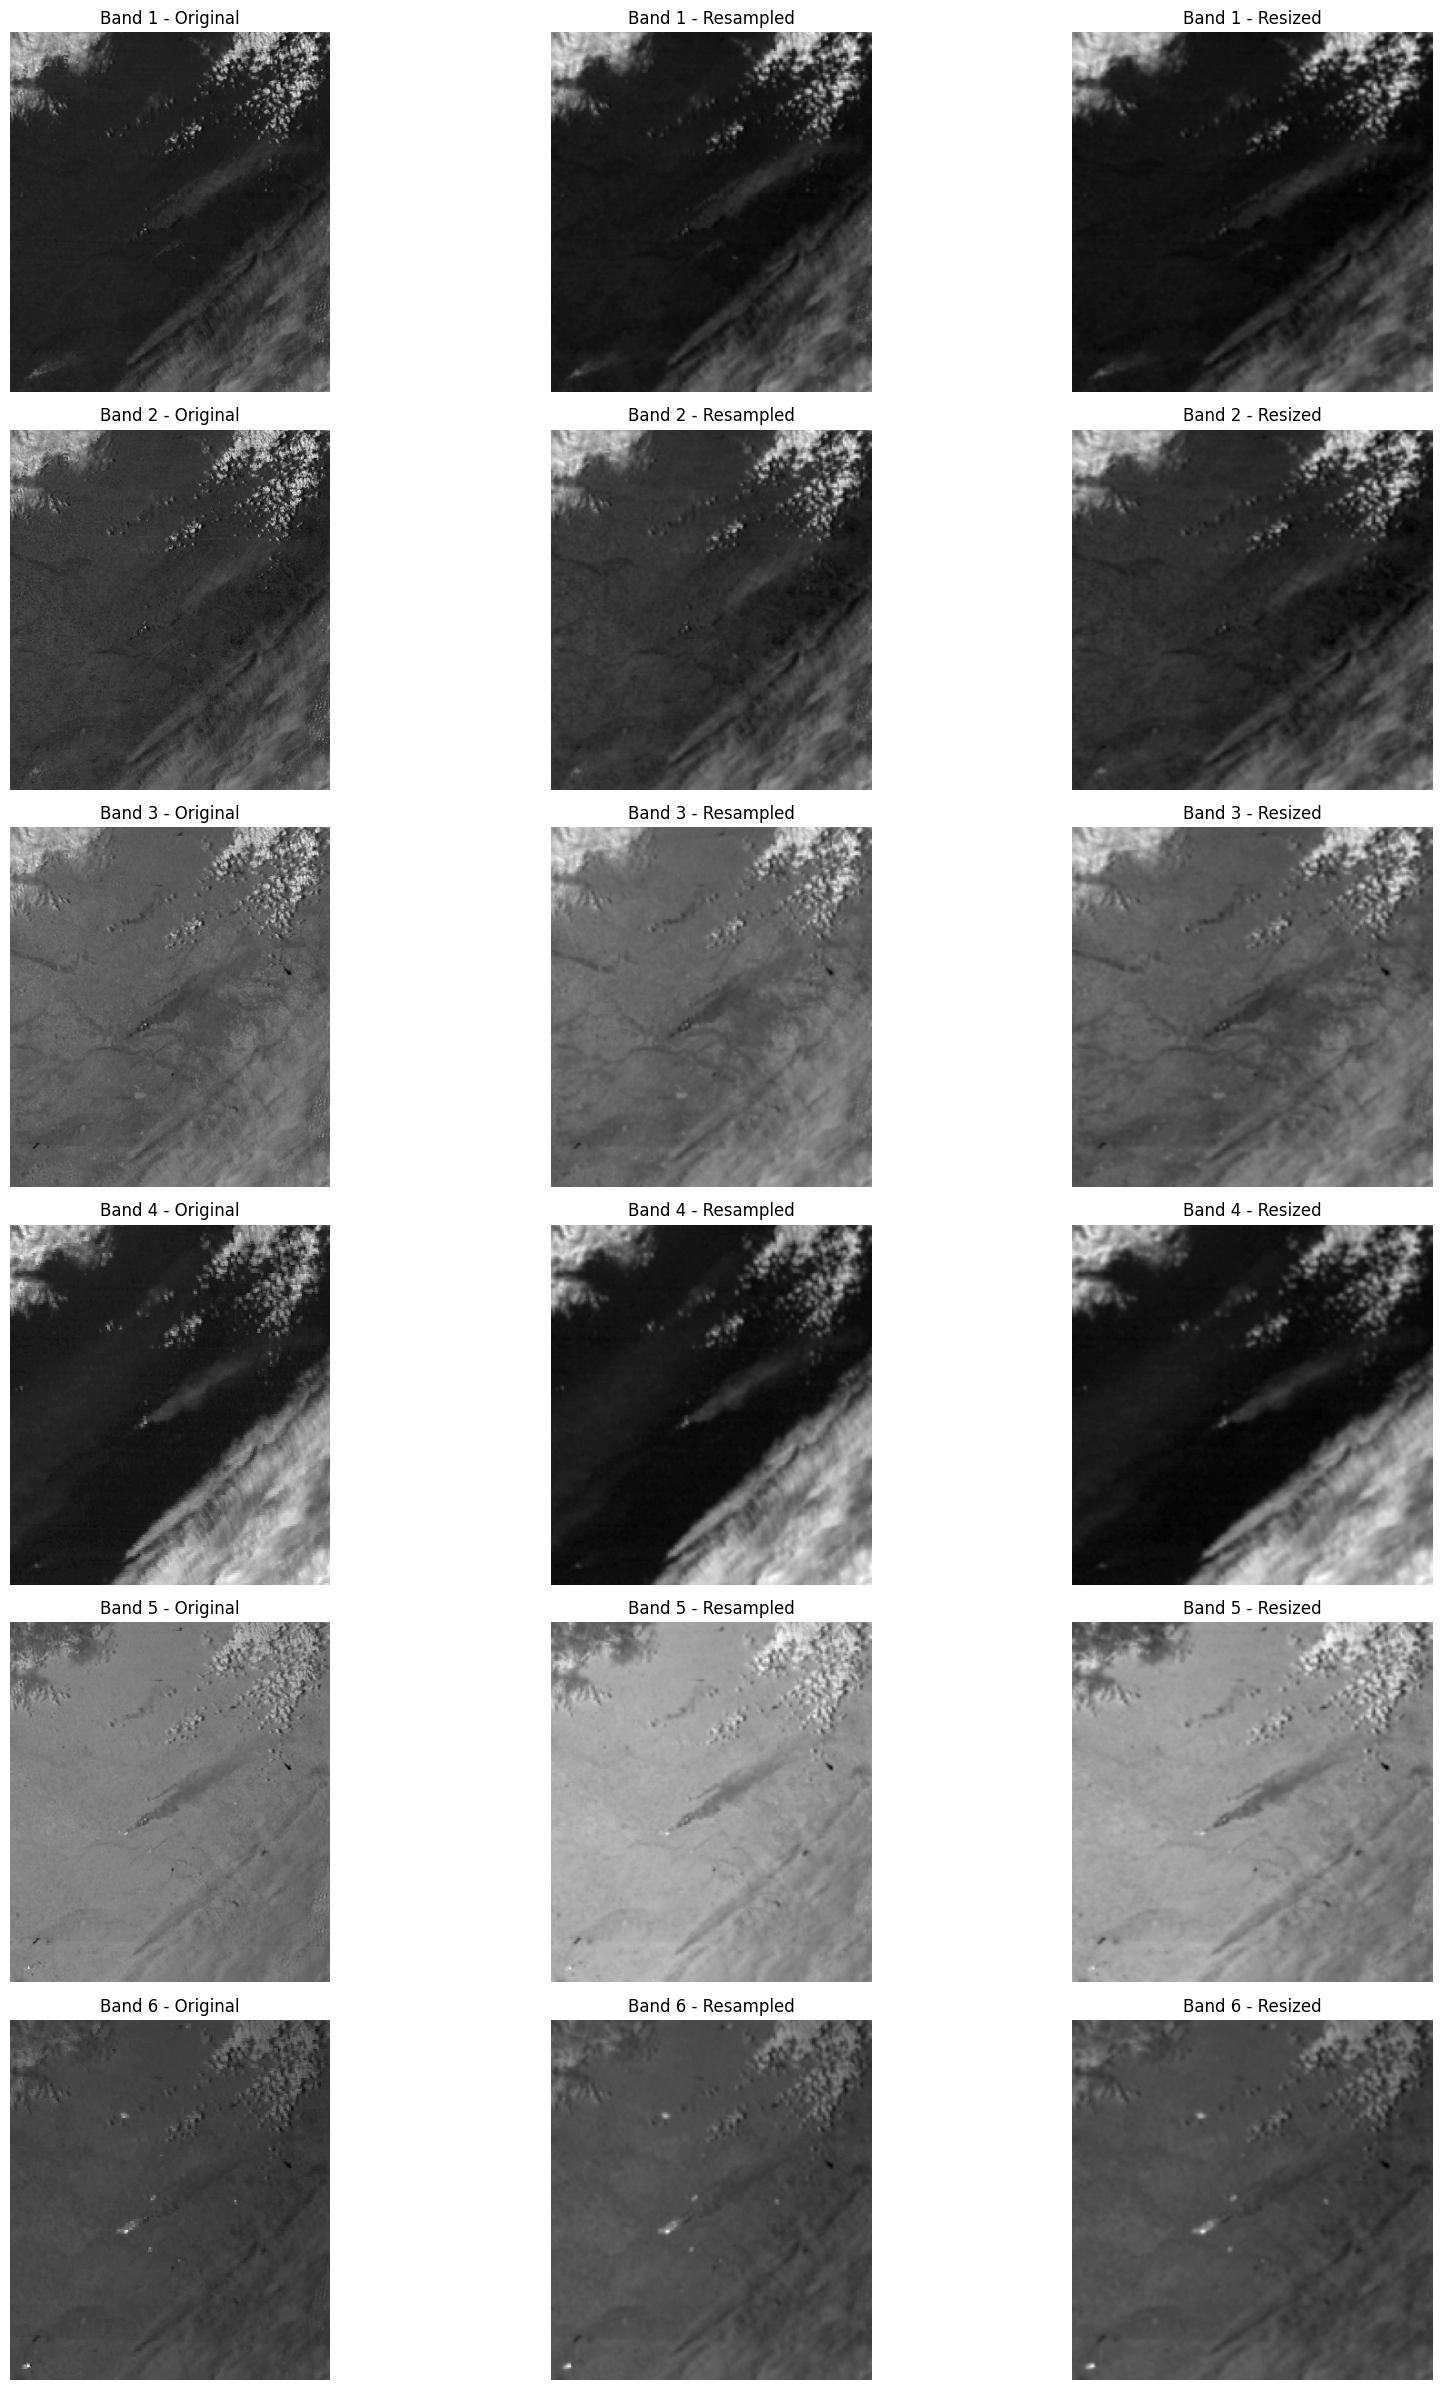

In [37]:
import os
import rasterio
import matplotlib.pyplot as plt

# Specify the paths to the three TIFF files
original_file = "D:/projects/research/smoke/dataset/original/time-20170652036101-loc--102.0_35.2_-97.2_39.5.tif"
resampled_file = "D:/projects/research/smoke/dataset/resampled/tiff/time-20170652036101-loc--102.0_35.2_-97.2_39.5.tif"
resized_file = "D:/projects/research/smoke/dataset/resampled/resized/tiff/time-20170652036101-loc--102.0_35.2_-97.2_39.5.tif"

# Open the original TIFF file
with rasterio.open(original_file, 'r') as src1:
    # Read the bands from the original file
    bands_original = src1.read()

# Open the resampled TIFF file
with rasterio.open(resampled_file, 'r') as src2:
    # Read the bands from the resampled file
    bands_resampled = src2.read()

# Open the resized TIFF file
with rasterio.open(resized_file, 'r') as src3:
    # Read the bands from the resized file
    bands_resized = src3.read()

# Plot each band side by side
num_bands = 6

fig, axes = plt.subplots(num_bands, 3, figsize=(18, 24))

# Iterate over each band
for band_idx in range(num_bands):
    # Plot the band from the original file
    axes[band_idx, 0].imshow(bands_original[band_idx], cmap='gray')
    axes[band_idx, 0].set_title(f'Band {band_idx+1} - Original')
    axes[band_idx, 0].axis('off')

    # Plot the band from the resampled file
    axes[band_idx, 1].imshow(bands_resampled[band_idx], cmap='gray')
    axes[band_idx, 1].set_title(f'Band {band_idx+1} - Resampled')
    axes[band_idx, 1].axis('off')

    # Plot the band from the resized file
    axes[band_idx, 2].imshow(bands_resized[band_idx], cmap='gray')
    axes[band_idx, 2].set_title(f'Band {band_idx+1} - Resized')
    axes[band_idx, 2].axis('off')

plt.tight_layout()
plt.show()


C:\Users\tejes\anaconda3\envs\smoke\Lib\site-packages\rasterio\__init__.py:320: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  dataset = DatasetReader(path, driver=driver, sharing=sharing, **kwargs)


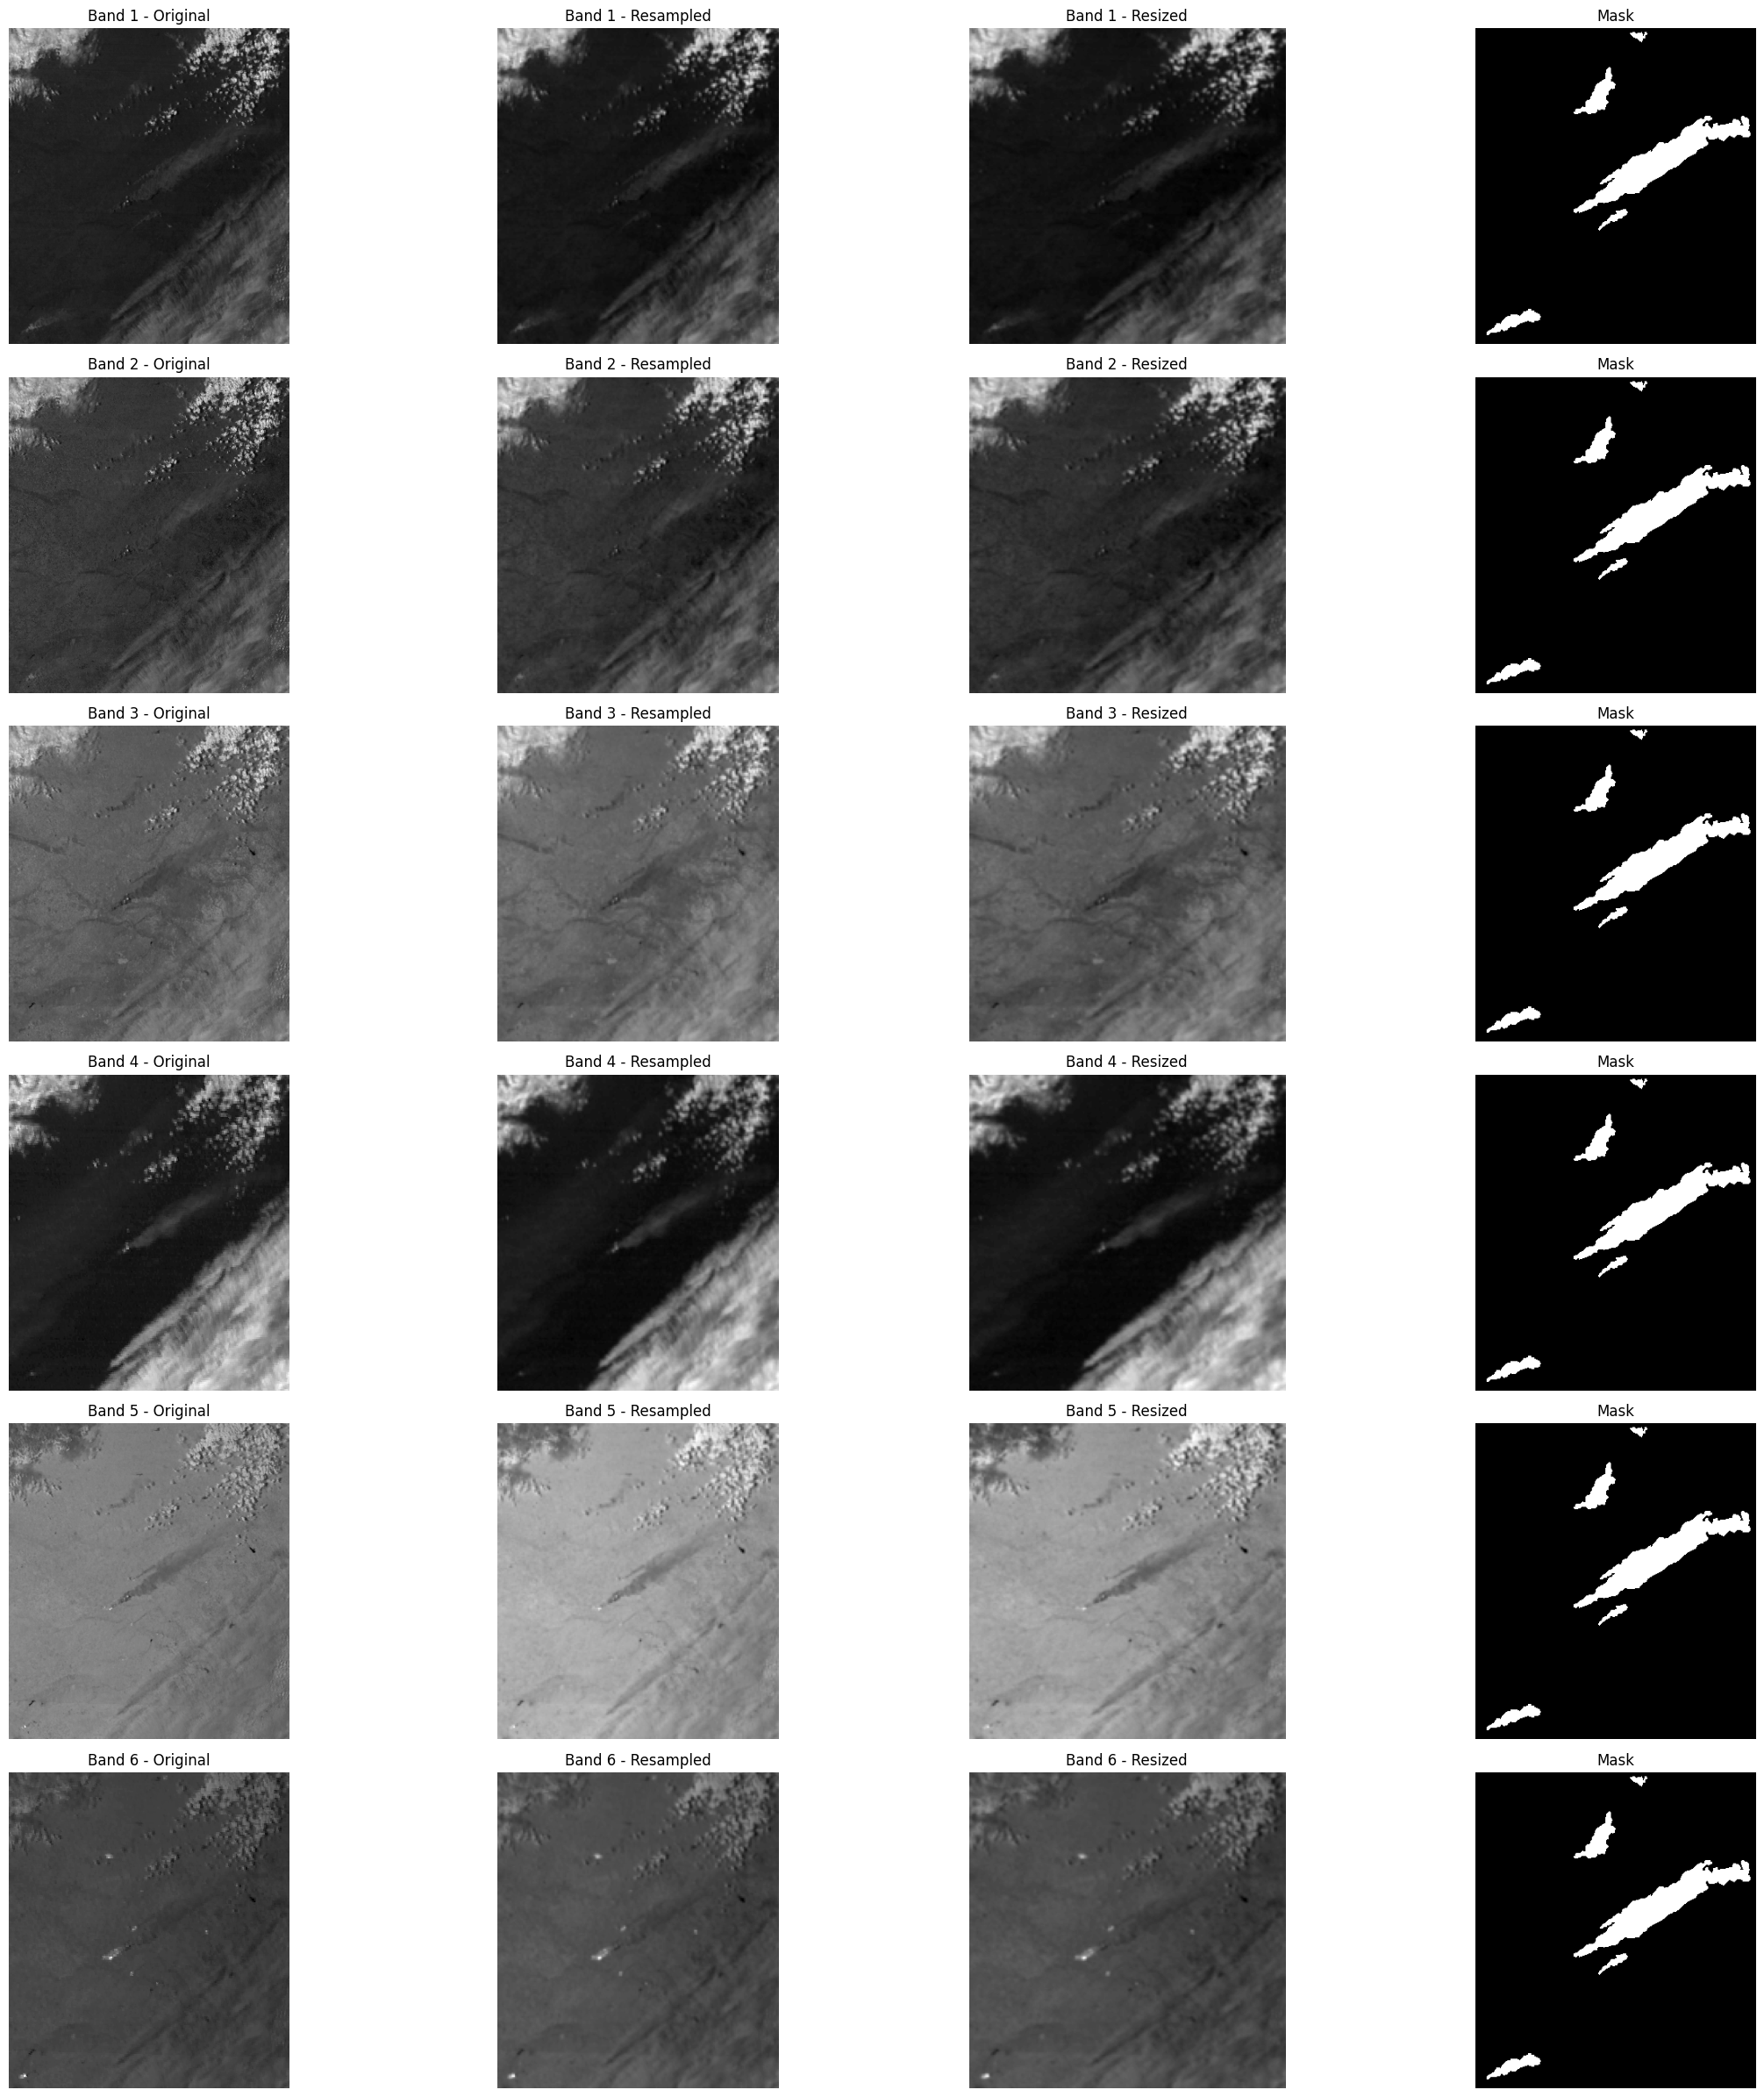

In [38]:
import os
import rasterio
import matplotlib.pyplot as plt

# Specify the paths to the TIFF files
original_file = "D:/projects/research/smoke/dataset/original/time-20170652036101-loc--102.0_35.2_-97.2_39.5.tif"
resampled_file = "D:/projects/research/smoke/dataset/resampled/tiff/time-20170652036101-loc--102.0_35.2_-97.2_39.5.tif"
resized_file = "D:/projects/research/smoke/dataset/resampled/resized/tiff/time-20170652036101-loc--102.0_35.2_-97.2_39.5.tif"
mask_file = "D:/projects/research/smoke/dataset/original/time-20170652036101-loc--102.0_35.2_-97.2_39.5.bmp"  # Replace with the actual path to your mask TIFF file

# Open the original TIFF file
with rasterio.open(original_file, 'r') as src1:
    # Read the bands from the original file
    bands_original = src1.read()

# Open the resampled TIFF file
with rasterio.open(resampled_file, 'r') as src2:
    # Read the bands from the resampled file
    bands_resampled = src2.read()

# Open the resized TIFF file
with rasterio.open(resized_file, 'r') as src3:
    # Read the bands from the resized file
    bands_resized = src3.read()

# Open the mask TIFF file
with rasterio.open(mask_file, 'r') as mask_src:
    # Read the mask data
    mask = mask_src.read(1)

# Plot each band and the mask side by side
num_bands = 6

fig, axes = plt.subplots(num_bands, 4, figsize=(24, 24))

# Iterate over each band
for band_idx in range(num_bands):
    # Plot the band from the original file
    axes[band_idx, 0].imshow(bands_original[band_idx], cmap='gray')
    axes[band_idx, 0].set_title(f'Band {band_idx+1} - Original')
    axes[band_idx, 0].axis('off')

    # Plot the band from the resampled file
    axes[band_idx, 1].imshow(bands_resampled[band_idx], cmap='gray')
    axes[band_idx, 1].set_title(f'Band {band_idx+1} - Resampled')
    axes[band_idx, 1].axis('off')

    # Plot the band from the resized file
    axes[band_idx, 2].imshow(bands_resized[band_idx], cmap='gray')
    axes[band_idx, 2].set_title(f'Band {band_idx+1} - Resized')
    axes[band_idx, 2].axis('off')

    # Plot the mask
    axes[band_idx, 3].imshow(mask, cmap='gray')
    axes[band_idx, 3].set_title('Mask')
    axes[band_idx, 3].axis('off')

plt.tight_layout()
plt.show()
